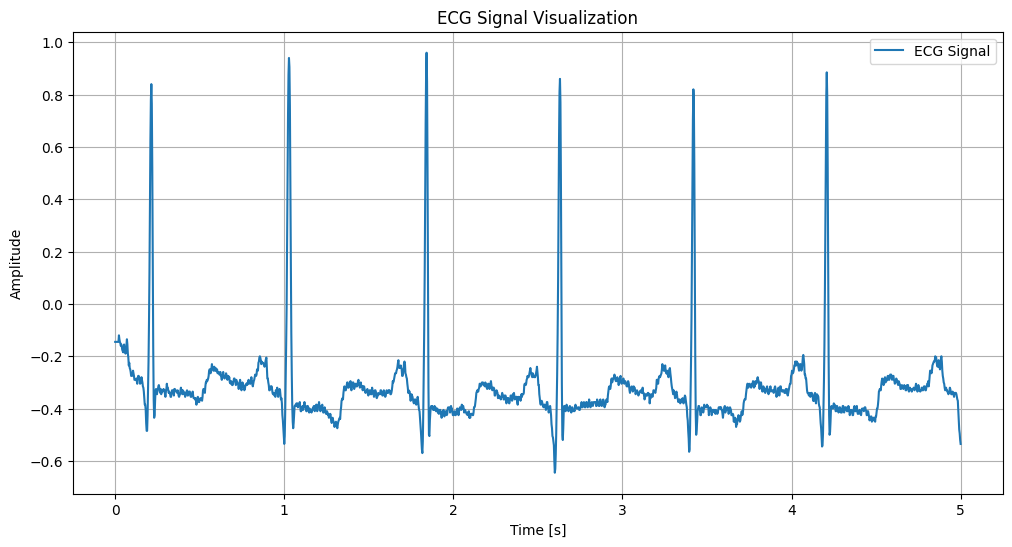

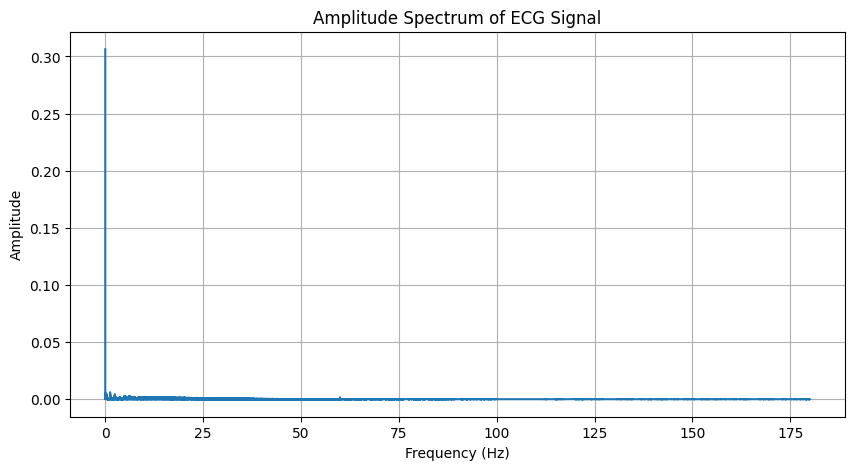

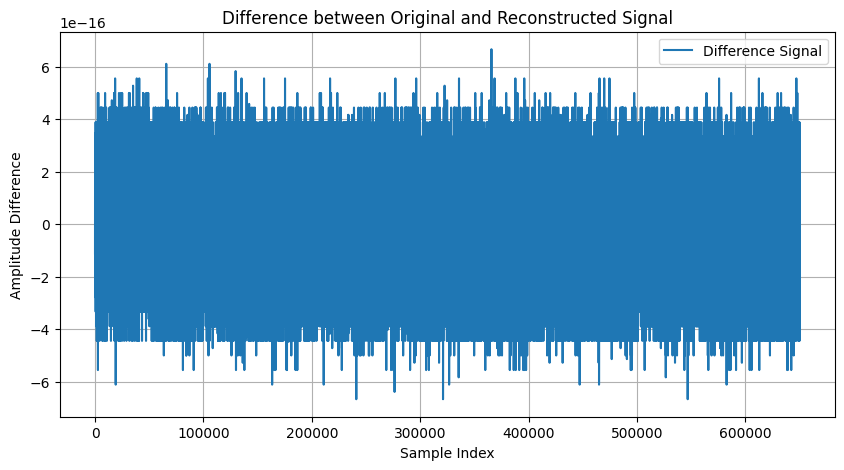

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

def load_ecg(filename):
    data = np.loadtxt(filename)
    if data.ndim == 1:
        return data.reshape(-1, 1)  # Konwersja do tablicy 2D
    return data

def plot_ecg(data, fs, start_time=0, duration=5, save_file=None):
    num_samples = data.shape[0]
    time = np.arange(num_samples) / fs
    
    if data.shape[1] > 1:
        if np.all(np.diff(data[:, 0]) > 0):  # Sprawdzenie czy pierwsza kolumna to czas
            time = data[:, 0]
            data = data[:, 1:]
    
    end_time = start_time + duration
    mask = (time >= start_time) & (time <= end_time)
    
    plt.figure(figsize=(12, 6))
    if data.shape[1] > 1:
        for i in range(data.shape[1]):
            plt.plot(time[mask], data[mask, i], label=f"Lead {i+1}")
    else:
        plt.plot(time[mask], data[mask], label='ECG Signal')
    
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.title("ECG Signal Visualization")
    plt.legend()
    plt.grid()
    plt.show()
    
    if save_file:
        np.savetxt(save_file, np.column_stack((time[mask], data[mask] if data.ndim == 1 else data[mask, :])), delimiter=',')
        print(f"Saved segment to {save_file}")

def plot_fft(signal, fs):
    N = len(signal)
    freq = np.linspace(0, fs/2, N//2)
    spectrum = fft(signal)
    amplitude_spectrum = np.abs(spectrum[:N//2]) / N
    
    plt.figure(figsize=(10, 5))
    plt.plot(freq, amplitude_spectrum)
    plt.title("Amplitude Spectrum of ECG Signal")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()
    
    return spectrum

def compare_ifft(signal, spectrum):
    reconstructed_signal = np.real(ifft(spectrum))
    difference = signal - reconstructed_signal
    
    plt.figure(figsize=(10, 5))
    plt.plot(difference, label="Difference Signal")
    plt.title("Difference between Original and Reconstructed Signal")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude Difference")
    plt.grid()
    plt.legend()
    plt.show()
    
    return reconstructed_signal

# Przykład użycia:
filename = "sygnaly-testowe/ekg100.txt"  # Podaj nazwę pliku
fs = 360  # Częstotliwość próbkowania dla ekg100.txt

data = load_ecg(filename)
signal = data[:, 0]

# Wykres sygnału
plot_ecg(data, fs, start_time=0, duration=5)

# Analiza FFT
spectrum = plot_fft(signal, fs)

# Porównanie odwrotnej FFT
reconstructed_signal = compare_ifft(signal, spectrum)
